# 다중 분류
- 펭귄 데이터셋

In [1]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: /content/penguins.csv
13.8kB [00:00, 13.9MB/s]       


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [13]:
penguins = pd.read_csv('/content/penguins.csv')
penguins.shape

(344, 7)

In [14]:
penguins.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [15]:
df = penguins.dropna()

In [16]:
df.isna().sum(axis=0)

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
df['species'] = df['species'].map({
                  'Adelie':0, 
                  'Chinstrap':1, 
                  'Gentoo':2
})

<ipython-input-17-1a57a2de7338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map({


In [18]:
df['island'] = df['island'].map({
                  'Torgersen':0, 
                  'Biscoe':1,
                  'Dream':2
})

<ipython-input-18-e4114ef062c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = df['island'].map({


In [19]:
df['sex'] = df['sex'].map({
              'FEMALE':0, 
              'MALE':1,
})

<ipython-input-19-671a88f90516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({


In [20]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,1
1,0,0,39.5,17.4,186.0,3800.0,0
2,0,0,40.3,18.0,195.0,3250.0,0
4,0,0,36.7,19.3,193.0,3450.0,0
5,0,0,39.3,20.6,190.0,3650.0,1


In [21]:
df.shape

(333, 7)

In [23]:
y = df['species']
X = df.drop(['species'], axis=1)
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,1
1,0,39.5,17.4,186.0,3800.0,0
2,0,40.3,18.0,195.0,3250.0,0
4,0,36.7,19.3,193.0,3450.0,0
5,0,39.3,20.6,190.0,3650.0,1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape)

(266, 6) (67, 6)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [29]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_train_oh

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [30]:
y_train

array([2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0,
       1, 2])

In [31]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_train_oh

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [54]:
X_train_s.shape

(266, 6)

In [38]:
y_train_oh.shape

(266, 3)

In [56]:
def build_model():

    model = keras.Sequential([
        layers.Dense(units=64, activation='relu', input_shape=(6,)),      #X_train_s shape과 input_shape 일치
        layers.Dense(units=8, activation='relu'),
        layers.Dense(units=3, activation='softmax')                       #y_train_oh shape과 units 일치 / 다중분류:softmax
        ])


    model.compile(
          optimizer='adam',
          loss='categorical_crossentropy',                                #다중분류:categorical_crossentropy
          metrics=['accuracy']
          )
    
    return model

In [57]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                448       
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 3)                 27        
                                                                 
Total params: 995
Trainable params: 995
Non-trainable params: 0
_________________________________________________________________


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


In [55]:
EPOCHS = 300
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_oh,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/300
7/7 [==============================] - 0s 27ms/step - loss: 8.6835e-04 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 2/300
7/7 [==============================] - 0s 17ms/step - loss: 8.6717e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 3/300
7/7 [==============================] - 0s 22ms/step - loss: 8.5326e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 8.4884e-04 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 8.4973e-04 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 8.2889e-04 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 7/300
7/7 [==============================] - 0s 9ms/step - loss: 8.1903e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

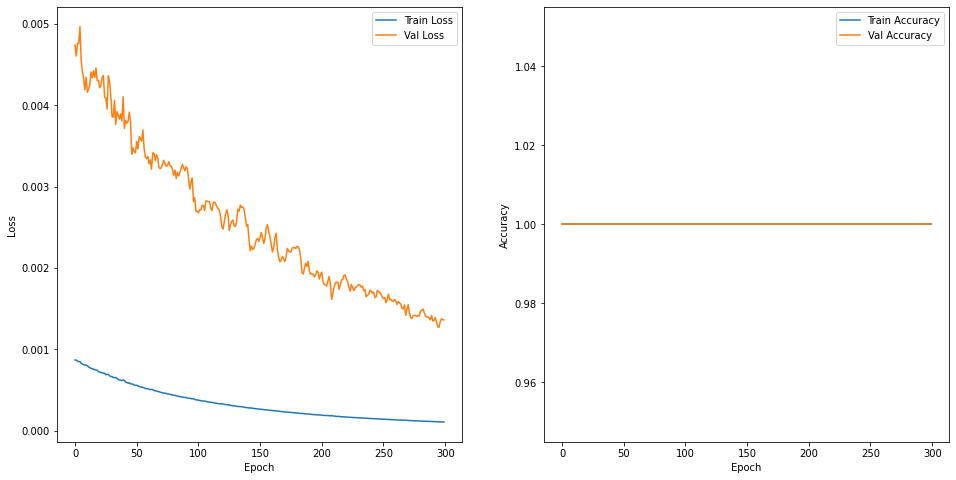

In [59]:
plot_history(history)

In [46]:
model.evaluate(X_train_s, y_train_oh)

9/9 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000


[0.0016395016573369503, 1.0]

In [60]:
X_test_s = scaler.transform(X_test)
y_test_oh = to_categorical(y_test)

In [48]:
model.evaluate(X_test_s, y_test_oh)

3/3 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 0.9851


[0.023882264271378517, 0.9850746393203735]

In [49]:
y_pred = model.predict(X_test_s)
y_pred

3/3 [==============================] - 0s 7ms/step


array([[7.00753927e-01, 2.94470340e-01, 4.77570342e-03],
       [1.41798591e-04, 3.25783330e-05, 9.99825716e-01],
       [9.99999106e-01, 2.69729711e-10, 8.83731445e-07],
       [9.99907315e-01, 6.18207764e-07, 9.19623344e-05],
       [1.57161267e-05, 2.15519549e-06, 9.99982059e-01],
       [1.06886931e-04, 5.56200503e-05, 9.99837637e-01],
       [1.75401528e-05, 4.73132059e-06, 9.99977648e-01],
       [9.99974191e-01, 5.23239798e-08, 2.57520933e-05],
       [9.94712472e-01, 2.68721860e-03, 2.60027032e-03],
       [2.91113014e-04, 9.99076247e-01, 6.32679090e-04],
       [9.99978125e-01, 5.10833473e-08, 2.18065725e-05],
       [9.99971807e-01, 1.19358987e-07, 2.80372096e-05],
       [1.46502149e-04, 9.99705076e-01, 1.48515028e-04],
       [1.23453501e-05, 1.22110146e-06, 9.99986351e-01],
       [9.99930203e-01, 1.50331543e-05, 5.46642477e-05],
       [9.99987066e-01, 2.57526285e-08, 1.28755182e-05],
       [9.98113096e-01, 4.20365759e-05, 1.84480892e-03],
       [9.99755740e-01, 2.90562

In [50]:
y_test_oh

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

In [51]:
y_test.values

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1,
       0])

In [52]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1,
       0])

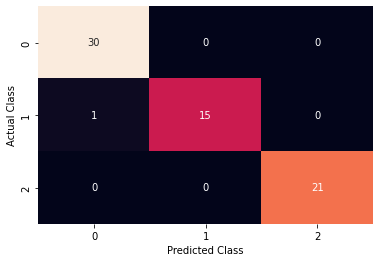

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()